In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as  pd
%matplotlib inline
import matplotlib

In [2]:
matplotlib.rcParams["figure.figsize"] = (20,10)

## Prepare the Data for Regression Through Exploratory Data Analysis ##

The EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Steps of EDA referred from Ref :https://github.com/rhasanbd/Data-Scientist-s-Handbook-1/blob/master/Data%20Scientist's%20Handbook-I.ipynb

###  1. Load Data ###

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

### 2. Quick check of data ###

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
#Dimension of Data

print("Dimension of the data: ", df1.shape)

no_of_rows = df1.shape[0]
no_of_columns = df1.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (13320, 9)
No. of Rows: 13320
No. of Columns: 9


### 3. Description of data df.info() ###

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### 4. Visualization of Data    <br> 
We can plot histogram for each numerical attribute.

array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

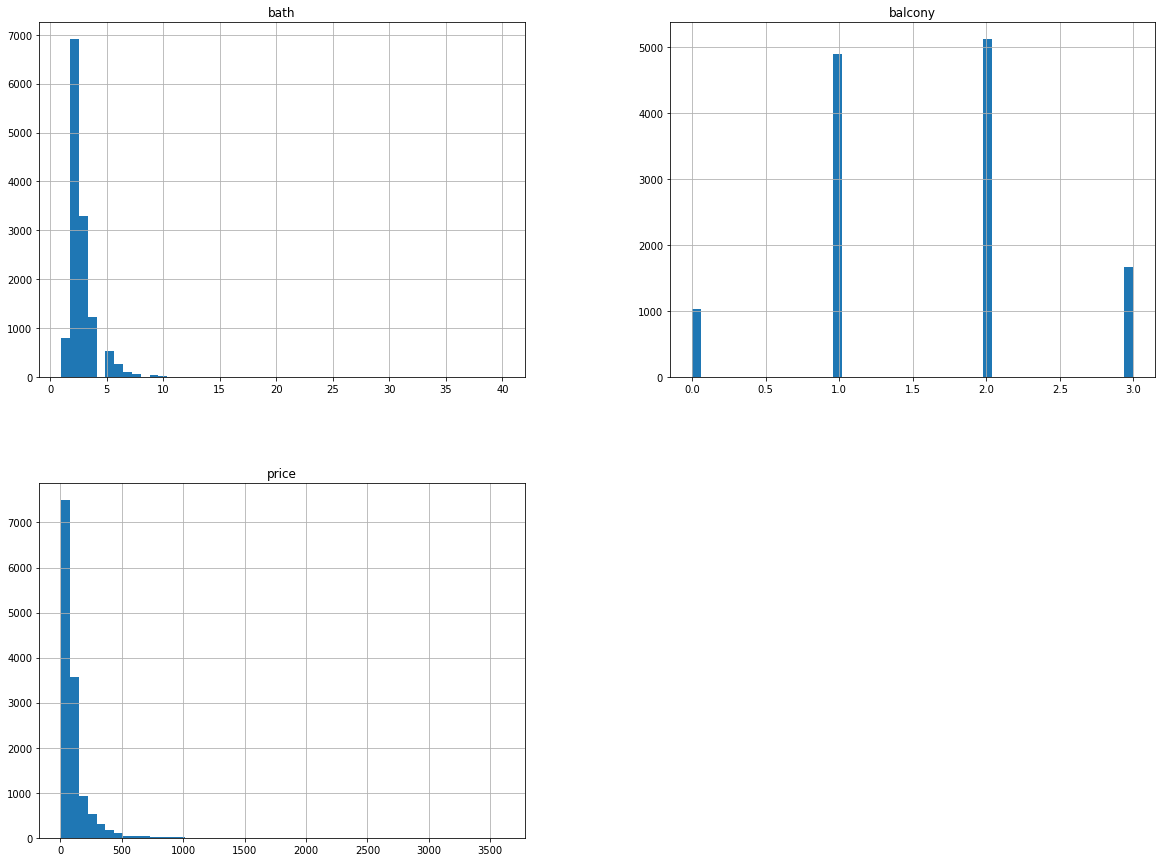

In [8]:
df1.hist(bins=50, figsize=(20,15)) 

Here, we can infer that  balcony does not have any influence in prices.

<AxesSubplot:>

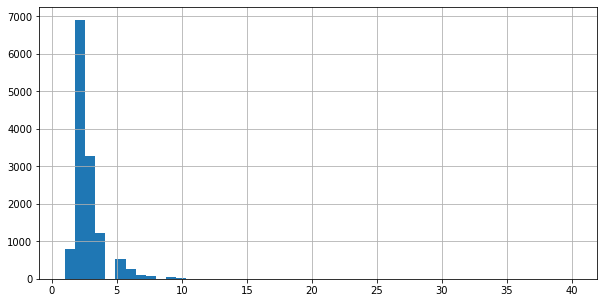

In [9]:
df1['bath'].hist(bins=50, figsize=(10,5)) 

### 5. Explore the data ###
In order to explore data we have to 
* Describe columns with numerical attributes
* Describe columns with numerical aatributes
* Explore Columns
* Check the invalid Values in a column


In [10]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<Figure size 1440x720 with 0 Axes>

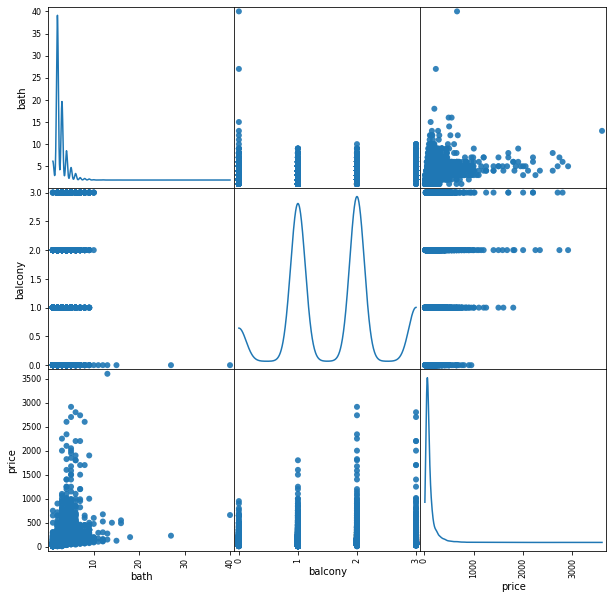

In [11]:
from pandas.plotting import scatter_matrix
#display scatter_matrix also
fig = plt.figure()
scatter_matrix(df1,figsize =(10,10),alpha=0.9,diagonal="kde",marker="o");

From the scatter matrix above, we can infer that balcony doesnot have any significant correlation with our target variable price.

In [12]:
hcorr = df1.corr()
hcorr.style.background_gradient()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [13]:
#Describe column with cattegorical value
# Value Counts for Categorical Columns

# Print the value counts for categorical columns
for col in df1.columns:
    if df1[col].dtype == 'object':
        print('\nColumn Name:', col)
        print(df1[col].value_counts())



Column Name: area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Column Name: availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
16-Jul               1
14-Jul               1
15-Jun               1
16-Oct               1
Name: availability, Length: 81, dtype: int64

Column Name: location
Whitefield           540
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
1 Annasandrapalya      1
Asthagrama Layout      1
Badrappa Layout        1
arudi                  1
St Thomas Town         1
Name: location, Length: 1305, dtype: int64

Column Name: size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom   

In [14]:
df1["price"]

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [15]:
#check the number of os in target column
count = 0

def zeroCount(dataFrame, columnName):
    noOfZeros = 0
    for i in range(dataFrame.shape[0]):
        if dataFrame[columnName][i] == 0:
            noOfZeros = noOfZeros + 1
    return noOfZeros

count = zeroCount(df1, 'price')

print("Number of 0s in the Target Column: %d" % count)

Number of 0s in the Target Column: 0


In [16]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [17]:
#this time we are dropping these columns but not always
#df2 = df1.drop(["area_type","society","balcony","availability"],axis ="columns")

### 6. Data Cleaning <br>
We need to clean the missing features, otherwise the ML algorithms won’t work. By "missing" we simply mean NA ("not available") or "not present for whatever reason". Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. The NaN is the default missing value marker.

**There are three techniques to clean data**:

* Drop the "NA" Missing Feature Values
* Drop the "Non-NA" Missing Feature Values
* Replace the Missing Feature Values <br>


#### a.  Drop the "NA" Missing Feature Values
We exclude labels from a data set which refer to missing data (NA).To do this, we use DataFrame's dropna() and drop() methods.

#### b. Drop the "Non-NA" Missing Feature Values
Sometimes we consider some values (other than NA) as "missing" values.

For example, the value "0" in the target column is considered as a missing value. 

#### c. To replace an empty cell with zero values, we will use DataFrame’s fillna() method 

The fillna() method can "fill in" NA (Not Available) or missing values with non-NA data in a couple of ways.

For example, we can fill in the empty cells with 0 values: df["price"] = df["price"].fillna(0)

Or, we can fill in the empty cells with median values: median = df["price"].median() df["price"] = df["price"].fillna(median, inplace=True)

Since, there were no empty cells in the target column, we don't have to use the fillna() method. But it's a very useful tool to have in your toolbox for data cleaning.


In [18]:
df1 = df1[~df1['price'].isin([0])]

In [19]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Drop the features that are deemed irrevelant in our model<br>
Society might have been important. But lot of null values. 

In [20]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [23]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [24]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### 7. Feature Engineering  <br>
a. Add a new column for BHK with numerical value <br>
b. The total squarefeet column is in range and with different metrics. For a value in range, it is converted to single value by average and all values are converted as per square meter.<br>
c. Add new feature Proice per square feet.
d. We do dimensionality reduction by binning the occurrences less than 10 as other.

In [25]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [26]:
#here we do create a new column bhk with numerical value
df3["bhk"] = df3["size"].apply(lambda x:int(x.split(" ")[0]))

/home/samal/poudelnish/.conda/envs/myhouse/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [28]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [29]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [30]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df3[~df3["total_sqft"].apply(is_float)].tail(5)

,location,size,total_sqft,bath,price,bhk
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2
13299,Whitefield,4 BHK,2830 - 2882,5.0,154.500,4


In [33]:
#we have to tackle the range function. we are not going to change square inch and other metrics to squareft

def convert_strtonum(x):
    tokens = x.split("-")  #split the numbers with -
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
#if we want to split and make use of data with sq yards and all
# import re
# s='abcd2343 abw34324 abc3243-23A'
# re.split('(\d+)',s)

In [35]:
df4 = df3.copy()
df4["total_sqft"] =df4["total_sqft"].apply(convert_strtonum)

In [36]:
df4.head()
#df4.loc[12435]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [37]:
#creating price per sqft column will help us locate the outlier 
df5 = df4.copy()
df5["price_per_sqft"]= df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
#check how many locations we have 
len(df5.location.unique())

1304

In [39]:
# Since unique locations are 1305, one hot encoding would give lots of dimensions for eg, 1304 here. 
# So we have to reduce the dimension.
#So for dimensionality reduction, lets find out how many data points are available for
#each unique value.

In [40]:
#remove leading space
df5.location = df5.location.apply(lambda x:x.strip())

In [41]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [42]:
#df5["location"].value_counts(ascending =False)

In [43]:
locations_stats = df5.groupby("location")["location"].agg("count")

In [44]:
locations_stats.sort_values(ascending =False)


location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [45]:
len(locations_stats[locations_stats<=10])

1052

In [46]:
locations_statsless_than10 = locations_stats[locations_stats<=10]

In [47]:
df5.location =df5.location.apply(lambda x:"other" if x in locations_statsless_than10 else x  )

In [48]:
len(df5.location.unique())

242

### 8. Outlier Detection and Removal 
For outlier detection we use domain knowledge and statistical methods . Use different techniques like std deviation

In [49]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Expert help is one of the important approach we can take for detecting outlier beside conventional statistical methods.

In [50]:
df5[df5.total_sqft/df5.bhk<300].head(20) #generally a 2bhk appartment would be more than 600 sq ft.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [51]:
len(df5[(df5.total_sqft/df5.bhk<300)])

744

In [52]:
#if we want to filter all these rows, 
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [53]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [54]:
# Generally the price of house is related to where it is situated.write a function based on std deviation .Since we are making a generic model . 
#we have to do it per location as location would be direcly related to cost
def remove_outliers_std(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        mean_p = np.mean(subdf.price_per_sqft)
        std_p = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean_p-std_p)) &(subdf.price_per_sqft<=(mean_p+std_p))] 
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_outliers_std(df6)
df7.shape

    


(10241, 7)

In [55]:
df7.location.unique()

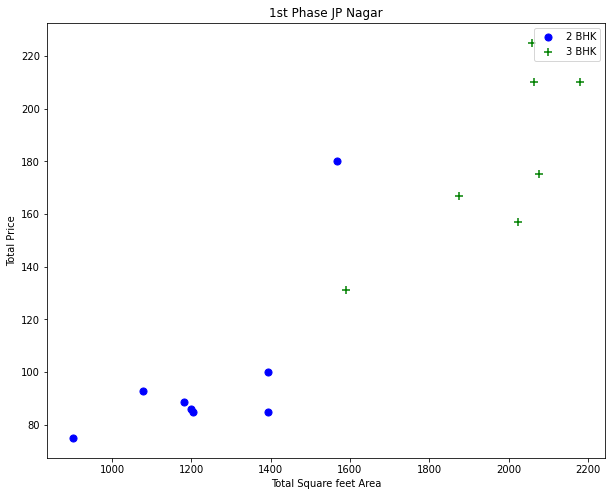

In [56]:
# this function takes location and dataframe as an input .
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location ==location) & (df.bhk==2)]
    bhk3 = df[(df.location ==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (10,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue", label ="2 BHK",s =50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color = 'green', label ="3 BHK",s =50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Total Price")
    plt.title(location)
    plt.legend()
  
plot_scatter_chart(df7,"1st Phase JP Nagar")




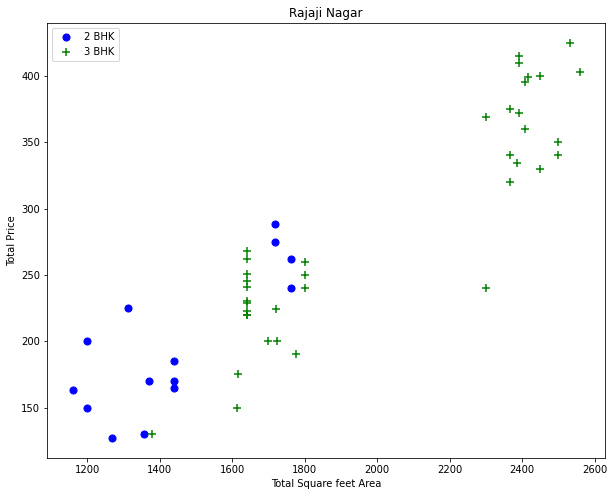

In [57]:
plot_scatter_chart(df7,"Rajaji Nagar")

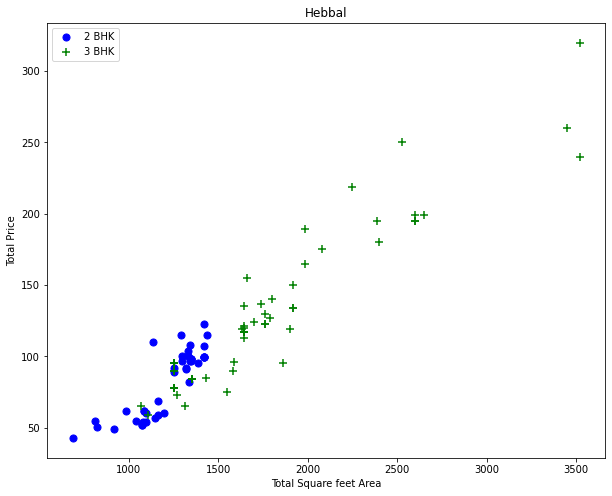

In [58]:
plot_scatter_chart(df7,"Hebbal")

As can be seen from the visualisations, there are some apartments from same location but 3 bhk has less price than 2 bhk. remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). Here,build a dictionary of stats per bhk, i.e.

In [59]:
def remove_bhk_outliers(df):
    no_indices = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean" :np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"): 
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                no_indices = np.append(no_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(no_indices,axis="index")            

In [60]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

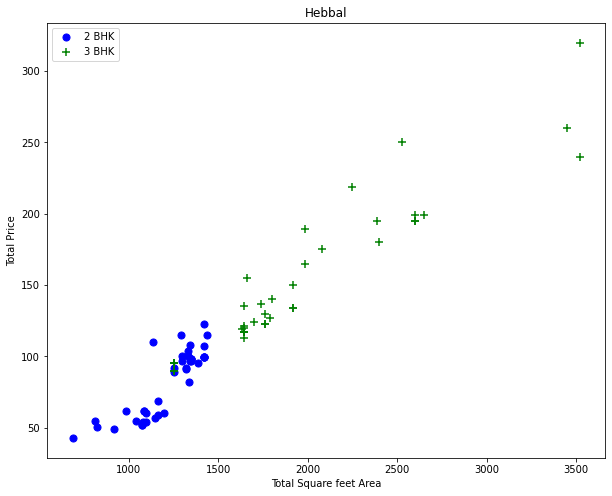

In [61]:
plot_scatter_chart(df8,"Hebbal")

In [62]:
#plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

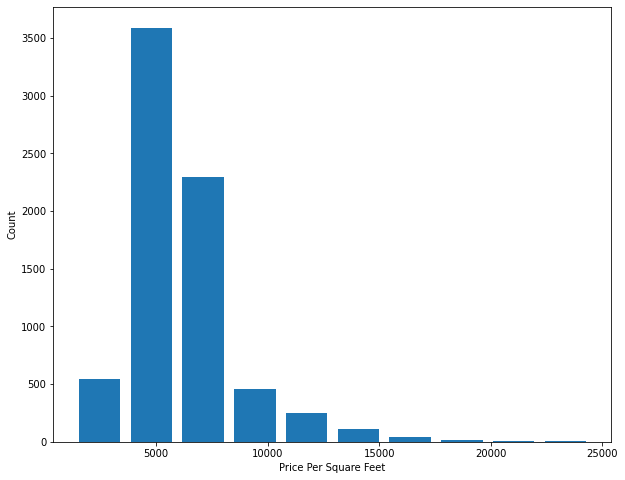

In [67]:
matplotlib.rcParams["figure.figsize"] = (10,8)
plt.hist(df8.price_per_sqft,rwidth =0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
      

In [68]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [69]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

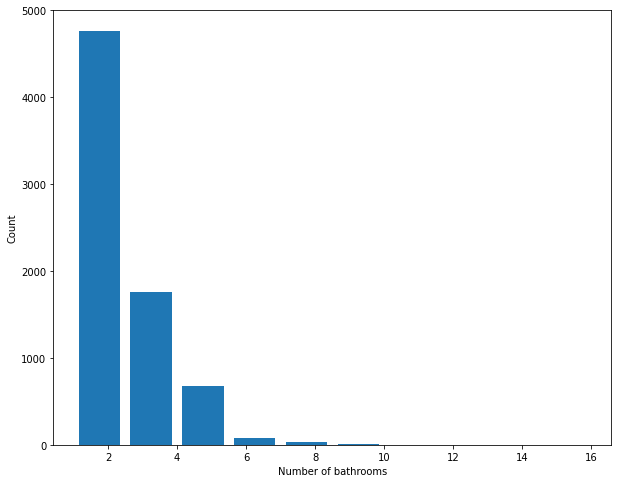

In [70]:
matplotlib.rcParams["figure.figsize"] = (10,8)
plt.hist(df8.bath,rwidth =0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [71]:
# if we have bathrooms greater than bedrooms plus 2 , we have to treat it as outlier

df9 = df8[df8.bath <= df8.bhk+2]
df9.shape

(7325, 7)

In [72]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [73]:
# so here, we can drop price_per_sqft 
# which we created for outlier detection and size as we have bhk in lue of that. 
df10 = df9.drop(["size","price_per_sqft"],axis ="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [74]:
df10.corr()

,total_sqft,bath,price,bhk
total_sqft,1.000000,0.710102,0.838573,0.676599
bath,0.710102,1.000000,0.611040,0.883119
price,0.838573,0.611040,1.000000,0.567745
bhk,0.676599,0.883119,0.567745,1.000000


In [87]:
# import seaborn as sns
# correlation = df10.corr()

# fig = plt.subplots(figsize=(10,10))
# sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

## Modal Building ##

In [75]:
#location should be converted . So one hot encoding is applied.

one_hot= pd.get_dummies(df10.location)
one_hot.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#to avoid a dummy variable trap, we can drop a column, we are dropping the last column other 
df11 = pd.concat([df10,one_hot.drop("other",axis ="columns")],axis ="columns")

In [77]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df12 = df11.drop(["location"],axis ="columns")

In [79]:
df12.shape

(7325, 245)

In [80]:
X = df12.drop(["price"],axis ="columns")
X.shape

(7325, 244)

In [81]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [82]:
from sklearn import __version__

print(__version__)

0.20.3


In [88]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [92]:
# Naive baseline is the median

import numpy as np


median_pred = np.median(y_train)
print("median prediction is ", median_pred)

mean_pred = np.mean(y_train)
print("mean prediction is ", mean_pred)




median_preds = [median_pred for _ in range(len(y_test))]
true = y_test
mean_preds = [mean_pred for _ in range(len(y_test))]



# Display the naive baseline metrics
md_mae, md_rmse = evaluate_predictions(median_preds, true)
mb_mae, mb_rmse = evaluate_predictions(mean_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(md_mae))
print('Median Baseline RMSE: {:.4f}'.format(md_rmse))

print('Mean Baseline  MAE: {:.4f}'.format(mb_mae))
print('Mean Baseline RMSE: {:.4f}'.format(mb_rmse))

median prediction is  73.0
mean prediction is  98.62644624573379
Median Baseline  MAE: 48.7201
Median Baseline RMSE: 100.4099
Mean Baseline  MAE: 53.4350
Mean Baseline RMSE: 97.0869


In [96]:
#split train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =10)


In [97]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8017674308563882

In [98]:
#we are going to use k fold cross validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv =cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

In [108]:
#Ridge Regression
from sklearn.linear_model import Ridge

lasso=Lasso()
parameters={'alpha':[1,2,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
0.6769009673360137


In [109]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#let us try other regression algorithms and figure out which gives us best, Method called grid search cv.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

def find_best_model(X,y):
    algos ={
        "linear_regression":{
        "model":LinearRegression(),
        "params":{
        "normalize":[True,False]
        }   

        },
        "lasso":{
            "model":Lasso(),
            "params": {
                "alpha":[1,2],
                "selection":["random","cyclic"]
                
            }
        },
        "decision_tree":{
            "model": DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter" :["best","random"]
            }
        }
    }
    scores =[]
    cv = ShuffleSplit(n_splits =5,test_size =0.2,random_state =0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
    return pd.DataFrame(scores,columns =["model","best_score","best_params"])   
        


find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.834855,{'normalize': False}
1,lasso,0.684343,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.745389,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [83]:
from sklearn import preprocessing
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size = 0.2,random_state = 0)
cross_val_score(xgb.XGBRegressor(),X,y,cv =cv)

array([0.83379747, 0.86774149, 0.8309488 , 0.82712551, 0.74287541])

In [85]:


xg_reg= xgb.XGBRegressor(objective = 'reg:squarederror' , 
                         colsample_bytree=0.4,
                         gamma=0,                 
                         learning_rate=0.1,
                         max_depth=3,
                         min_child_weight=1.5,
                         n_estimators=5000,                                                                    
                         reg_alpha=0.5,
                         reg_lambda=0.5,
                         subsample=0.6,
                         seed=42)

In [86]:
xg_reg.fit(X_train,y_train)

#preds = xg_reg.predict(X_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=nan,
       monotone_constraints='()', n_estimators=5000, n_jobs=2,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=42, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
       seed=42, subsample=0.6, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [88]:
from sklearn.metrics import r2_score
pred_train_lr= xg_reg.predict(X_train)
print(f'Root Mean squared Error for train  data  {np.sqrt(mean_squared_error(y_train,pred_train_lr))}')
print(f'R2 score {r2_score(y_train, pred_train_lr)}')

pred_test_lr= xg_reg.predict(X_test)
print(f'Root Mean squared Error for test data {np.sqrt(mean_squared_error(y_test,pred_test_lr))}') 
print(f'R2 score {r2_score(y_test, pred_test_lr)}')
#print(f'Accuracy {score(y_test, pred_test_lr)}')

Root Mean squared Error for train  data  16.358457121682157
R2 score 0.9677826859585031
Root Mean squared Error for test data 45.136969080525105
R2 score 0.7838560404990494


In [82]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [89]:
np.where(X.columns =='Whitefield')[0][0]


238

In [90]:
def predict_price (location,sqft,bath,bhk):
    loc_index = np.where(X.columns ==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] =sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]    

    

In [91]:
predict_price('Vishveshwarya Layout',1000,2,2)

28.43755550714623

In [96]:
predict_price('Indira Nagar',1000,1,2)

182.61013943141393

In [98]:
predict_price('Indira Nagar',1000,2,2)

183.84324442046943

In [100]:
predict_price('Indira Nagar',1000,3,2)

185.07634940952488

In [89]:
#Now we are exporting all artifacts that is needed by python flask.

import pickle
with open("home_prices_model_india.pickle","wb") as f :
    pickle.dump(lr_clf,f)


In [90]:
#other than model, we need column 
import json
columns = {
    "data_columns":[col.lower() for col in X.columns]
}
with open ("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
#now python flask server used as backend for UI application. 